# 랭체인(LangChain) Compression 예제 - JudgeGPT
## 작성자 : AISchool ( http://aischool.ai/%ec%98%a8%eb%9d%bc%ec%9d%b8-%ea%b0%95%ec%9d%98-%ec%b9%b4%ed%85%8c%ea%b3%a0%eb%a6%ac/ )
## 판결문 데이터 다운받기 : https://www.aihub.or.kr/aihubdata/data/view.do?currMenu=115&topMenu=100&aihubDataSe=data&dataSetSn=580

### Reference : https://python.langchain.com/docs/modules/data_connection/retrievers/contextual_compression/

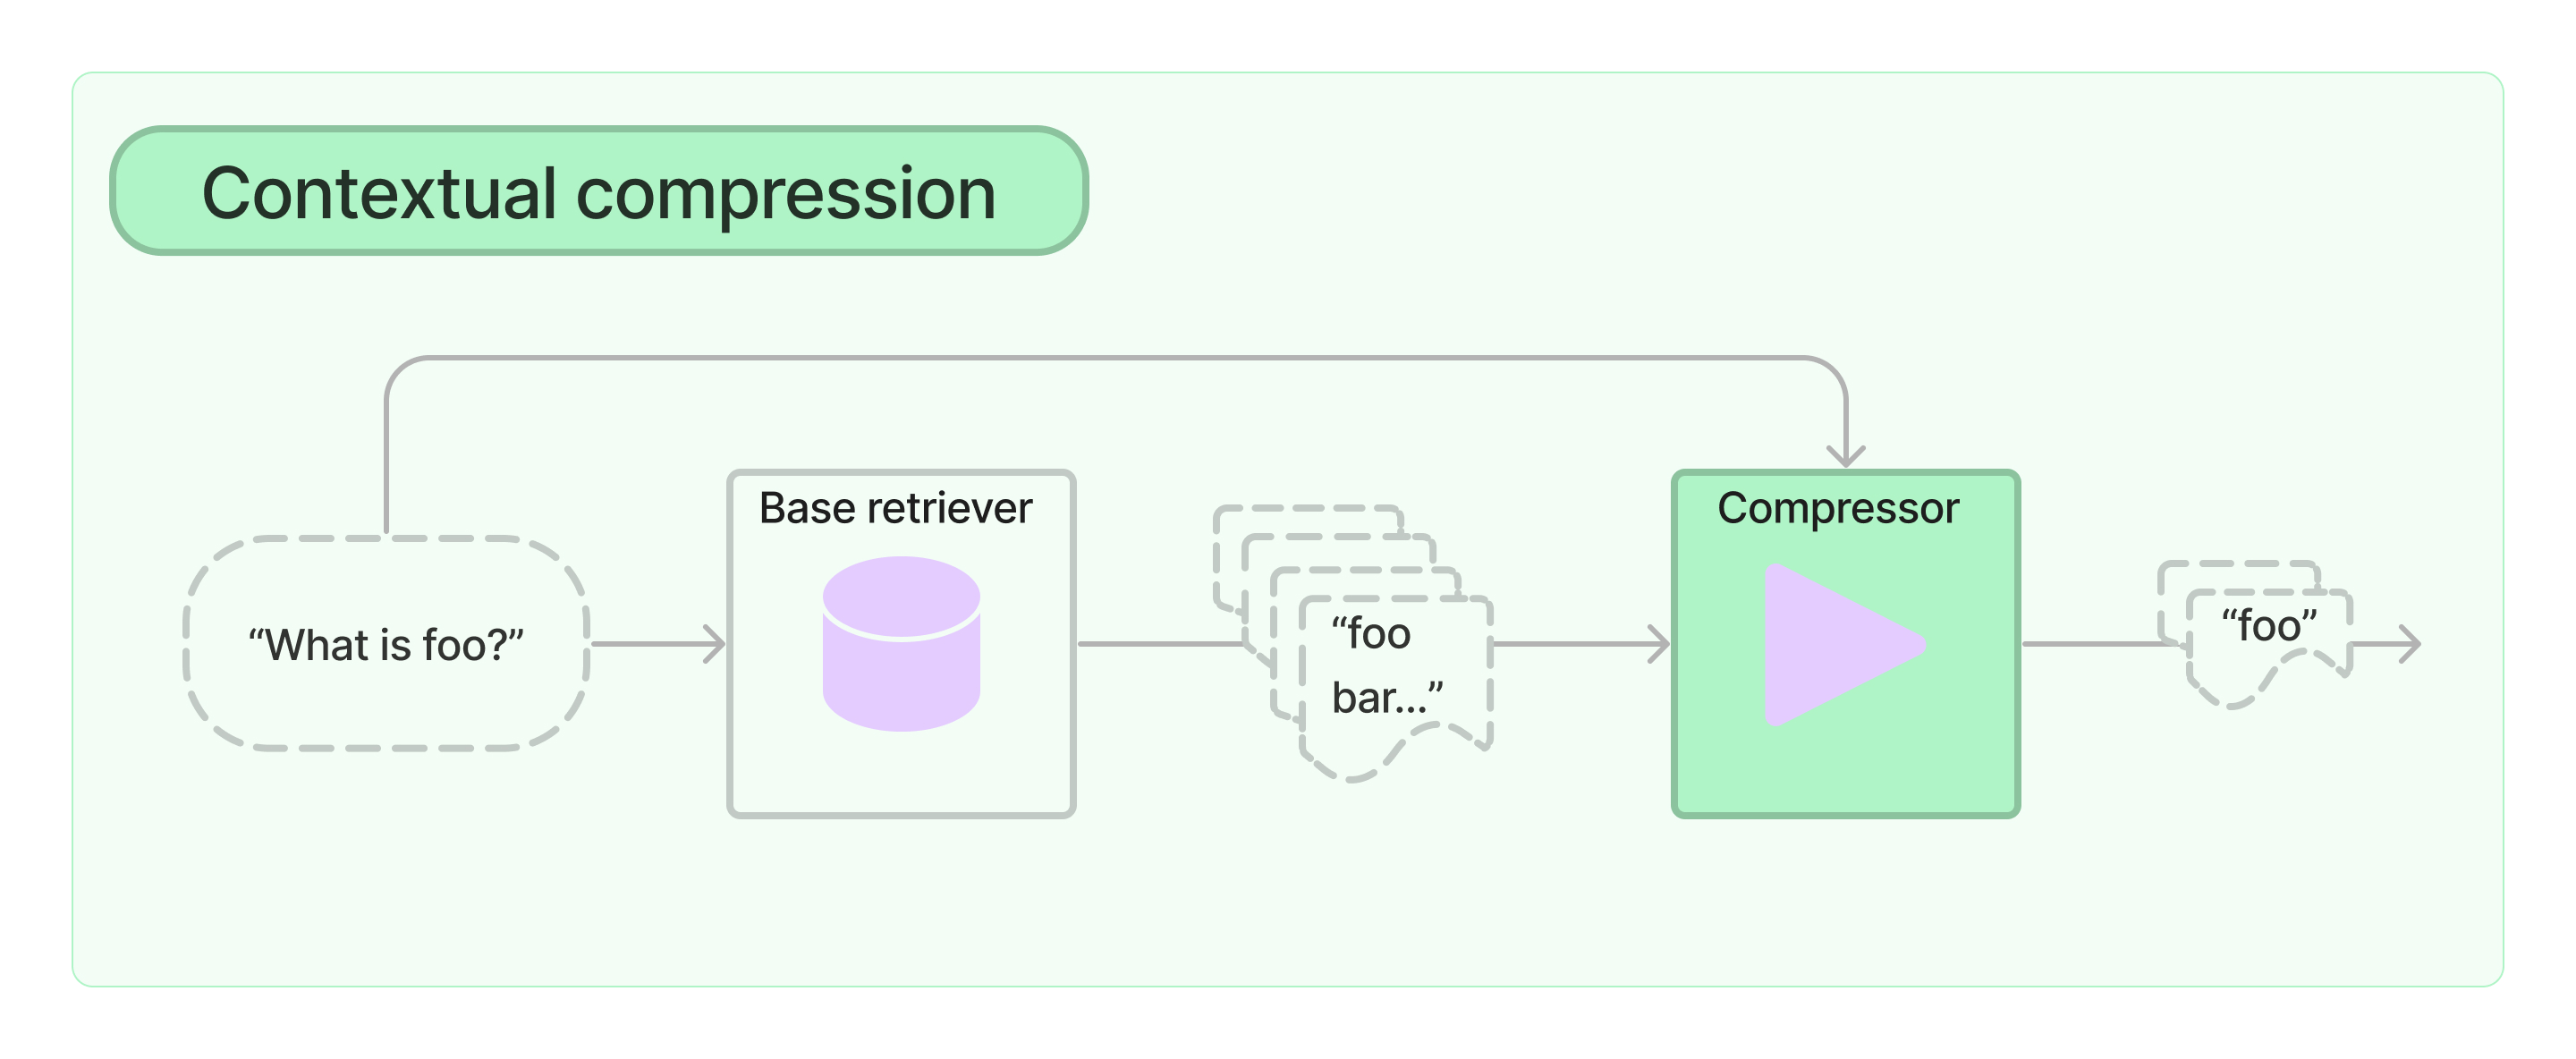

# 판결문 데이터 다운로드 & 업로드하기

In [ ]:
# /019.법률, 규정 (판결서, 약관 등) 텍스트 분석 데이터/01.데이터/1.Training/원천데이터_230510_add/
!unzip TS_1.판결문.zip.part0

# LangChain 라이브러리 설치

In [ ]:
!pip install langchain openai chromadb tiktoken pypdf unstructured sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.8/220.8 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 502.4/502.4 kB 43.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 74.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.6/277.6 kB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 74.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.9/92.9 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 9.3 MB/s eta

# 2021년도 형사 판결문 데이터 읽어오기

In [ ]:
from langchain.document_loaders import DirectoryLoader

loader = DirectoryLoader('/content/TS_1.판결문/1.Training/원천데이터/TS_1.판결문/02.형사/2021', glob="**/*.xml")
docs = loader.load()

In [ ]:
docs[0]

Document(page_content='\n\t\t\n판결문_형사 PDF\t\t\n\t\t\n\n\n\t\t\n2021노135.pdf\t\t\n\t\t\n\n\n\t\t\n\n, 1 ,\n\n대  구  고  등  법  원\n\n제 1 , 3 형 사 부\n\n판             결\n\n사       건 2021노135  성폭력범죄의처벌등에관한특례법위반(특수강간)\n\n피  고  인 1. A \n\n2. B \n\n3. C \n\n항  소  인 피고인 B, C 및 검사(피고인 A에 대하여)\n\n검       사 00(기소), 00(공판)\n\n변  호  인 변호사 00(피고인 A을 위한 국선)\n\n변호사 00(피고인 B, C을 위한 국선)\n\n원 심 판 결 대구지방법원 포항지원 2021. 2. 18. 선고 2020고합84 판결\n\n판 결 선 고 2021. 7. 15.\n\n  \n\n주       문\n\n원심판결 중 피고인 B, C에 대한 부분을 파기한다.\n\n피고인 B, C을 각 징역 2년 6월에 처한다.\n\n다만 이 판결 확정일로부터 각 4년간 형의 집행을 유예한다.\n\n피고인 B, C에게 각 80시간의 성폭력 치료강의 수강을 명한다.\n\n\n\n, 2 ,\n\n피고인 B, C에게 각 아동·청소년 관련기관 등 및 장애인복지시설에 5년간 취업제한을 \n\n명한다. \n\n검사의 피고인 A에 대한 항소를 기각한다.\n\n  \n\n이       유\n\n1. 항소이유의 요지\n\n  가. 검사\n\n    원심이 피고인 A에게 선고한 형(징역 5년 등)은 너무 가벼워서 부당하다. \n\n  나. 피고인 B, C\n\n    원심이 선고한 형(각 징역 2년 6월 등)은 너무 무거워서 부당하다.\n\n 피고인 A은 원심판결 선고 이후인 2021. 2. 19. 항소장을 제출하였다가 2021. 3. 22. \n\n포항교도소장에게 항소취하서를 제출하였는데, 2021. 3. 25.  집사람과 싸워서 홧김에 \n\n항소포기서를 제출하였으나 2심을 받아

In [ ]:
len(docs)

60

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

model_name = "jhgan/ko-sroberta-multitask" # (KorNLU 데이터셋에 학습시킨 한국어 임베딩 모델)
model_kwargs = {'device': 'cpu'}
encode_kwargs = {'normalize_embeddings': False}
embedding_model = HuggingFaceEmbeddings(
    model_name=model_name,
    model_kwargs=model_kwargs,
    encode_kwargs=encode_kwargs
)

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.86k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/744 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/123 [00:00<?, ?B/s]

(…)imilarity_evaluation_sts-dev_results.csv:   0%|          | 0.00/931 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/443M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

(…)milarity_evaluation_sts-test_results.csv:   0%|          | 0.00/302 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/585 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
from langchain.vectorstores import Chroma

#vectorstore.delete_collection()  # Collection 삭제
vectorstore = Chroma.from_documents(documents=docs, embedding=embedding_model)

# Vector Stores를 이용해 형사사건에 대한 전체 판례 찾기

In [ ]:
retriever = vectorstore.as_retriever()

In [ ]:
retrieved_docs = retriever.invoke(
    "절도 사건에 관한 판례를 알려줘"
)
print(retrieved_docs[0].page_content)


		
판결문_형사 PDF		
		


		
2021고단2704.pdf		
		


		

, 1 ,

서 울 남 부 지 방 법 원

판          결

사       건 2021고단2704  절도

피  고  인 A

검       사 00(기소), 00(공판)

변  호  인 변호사 00(국선)

판 결 선 고 2021. 8. 26.

  

주       문

피고인을 판시 제1 죄에 대하여 벌금 20만 원에, 판시 제2 죄에 대하여 벌금 30만 원

에 각 처한다.

피고인이 위 벌금을 납입하지 아니하는 경우 10만 원을 1일로 환산한 기간 피고인을 

노역장에 유치한다.

벌금에 상당한 금액의 가납을 명한다. 

  

이       유

범 죄 사 실

  피고인은 2019. 12. 19. 인천지방법원 부천지원에서 절도죄로 징역 6월에 집행유예 

2년을 선고받고 2019. 12. 27. 그 판결이 확정되었다. 

1. 2019. 10. 19.자 절도



, 2 ,

  피고인은 2019. 10. 19. 11:10경 0000에 있는 피해자 C이 운영하는 D 0000

점에서, 주위의 감시가 소홀한 틈을 타 그곳 판매대에 있던 시가 합계 18,630원 상

당의 식료품을 소지하고 있던 가방에 넣어 가지고 갔다.

  이로써 피고인은 피해자의 재물을 절취하였다.

2. 2021. 1. 1.자 절도

  피고인은 2021. 1. 1. 11:00경 0000 분리수거장에서, 주위의 감시가 

소홀한 틈을 타 피해자 E 아파트 소유인 시가 불상의 소주병 2개를 가지고 갔다.

  이로써 피고인은 피해자의 재물을 절취하였다.

증거의 요지

1. 피고인의 법정진술

1. F에 대한 경찰 진술조서

1. G의 진술서

1. 영수증, 재활용품 매각 계약서

1. 각 피해품 및 현장 CCTV 사진

1. 판시 전과 : 범죄경력등조회회보서, 수사보고(관련전과 확인), 판결문 및 약식명령문 

법령의 적용

1. 범죄사실에 대한 해당법조 및 형의 선택

   각 

In [ ]:
retrieved_docs = retriever.invoke(
    "마약 사건에 관한 판례를 알려줘"
)
print(retrieved_docs[0].page_content)


		
판결문_형사 PDF		
		


		
2021고합31.pdf		
		


		

, 1 ,

서 울 중 앙 지 방 법 원

제 2 7 형 사 부

판           결

사       건 2021고합31   강도, 마약류관리에관한법률위반(향정), 업무방해

피  고  인 A

검       사 00(기소), 00(공판)

변  호  인 000

담당 변호사 00

판 결 선 고 2021. 5. 7.

  

주       문

피고인을 징역 2년에 처한다.

다만, 이 판결 확정일부터 4년간 위 형의 집행을 유예한다. 

피고인에 대하여 보호관찰을 받을 것과 40시간의 약물치료강의 수강을 명한다. 

피고인으로부터 200,000원을 추징한다. 

압수된 재킷(증 제5호)을 피해자 B에게 환부한다. 

위 추징금에 상당한 금액의 가납을 명한다. 

  

이       유



, 2 ,

범 죄 사 실

1. 마약류관리에관한법률위반(향정) 

  피고인은 마약류 취급자가 아님에도 불구하고 다음과 같이 향정신성의약품인 메트 

암페타민(일명  필로폰 , 이하  필로폰 이라 함)을 취급하였다.

  가. 피고인은 2020. 12. 22. 새벽 무렵 0000 C 주상복합 건물 D호 E의 주거

지에서 F으로부터 무상으로 교부받은 필로폰 불상량이 들어있는 일회용 주사기에 물을 

넣고 희석한 뒤 피고인의 팔에 주사하는 방법으로 필로폰을 투약하였다.

  나. 피고인은 2020. 12. 23. 새벽 무렵 위 E의 주거지에서 F으로부터 무상으로 교부

받은 필로폰 불상량을 일회용 주사기에 넣고 물로 희석한 뒤 피고인의 팔에 주사하는 

방법으로 필로폰을 투약하였다.

2. 강도

  피고인은 2020. 12. 23. 16:28경부터 같은 날 17:15경 사이에 0000 C 주상복

합 건물 지하 5층에서 피해자 B(44세)가 0 차량 운전석에 앉아 전화 통화하는 

것을 발견하고 몰래 다가가 갑자기 차량 운전석 문을 열고 피해자의 멱살을 잡아끌어 

내리며 주

# 1. GPT로 판결문 요약하기 (Compression)

In [ ]:
OPENAI_KEY = "여러분의_OPENAI_API_KEY"

In [ ]:
# 긴 context를 다루기 위해 gpt-3.5-turbo-16k를 이용해서 LLM 설정
from langchain.chat_models import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-3.5-turbo-16k", temperature=0, openai_api_key=OPENAI_KEY)

In [ ]:
from langchain.prompts.chat import ChatPromptTemplate

template = """당신은 판례를 요약하는 유용한 조수입니다. \
사용자가 판례를 전달하면 판례의 주요내용을 요약합니다. \
사건 번호, 판결 선고일, 형량, 범죄사실은 꼭 포함하십시오."""
human_template = "{text}"

chat_prompt = ChatPromptTemplate.from_messages([
    ("system", template),
    ("human", human_template),
])
chain = chat_prompt | llm

In [ ]:
docs[0]

In [ ]:
result = chain.invoke({"text": docs[0]})
print(result.content)

판례 번호: 2021노135
판결 선고일: 2021.7.15
형량: 피고인 B, C에게 각 징역 2년 6월에 처한다. 다만, 이 판결 확정일로부터 각 4년간 형의 집행을 유예한다.
범죄사실: 성폭력범죄의 처벌 등에 관한 특례법위반(특수강간)
판결 요지: 피고인 B, C에 대한 부분을 파기하고, 피고인 B, C에게 각 징역 2년 6월에 처한다. 다만, 이 판결 확정일로부터 각 4년간 형의 집행을 유예한다. 피고인 B, C에게 각 80시간의 성폭력 치료강의 수강을 명한다. 또한, 피고인 B, C에게 각 아동·청소년 관련기관 등 및 장애인복지시설에 5년간 취업제한을 명한다. 검사의 피고인 A에 대한 항소를 기각한다.


In [ ]:
for idx, doc in enumerate(docs):
    print(idx, len(doc.page_content), doc)

0 4137 page_content='\n\t\t\n판결문_형사 PDF\t\t\n\t\t\n\n\n\t\t\n2021노135.pdf\t\t\n\t\t\n\n\n\t\t\n\n, 1 ,\n\n대  구  고  등  법  원\n\n제 1 , 3 형 사 부\n\n판             결\n\n사       건 2021노135  성폭력범죄의처벌등에관한특례법위반(특수강간)\n\n피  고  인 1. A \n\n2. B \n\n3. C \n\n항  소  인 피고인 B, C 및 검사(피고인 A에 대하여)\n\n검       사 00(기소), 00(공판)\n\n변  호  인 변호사 00(피고인 A을 위한 국선)\n\n변호사 00(피고인 B, C을 위한 국선)\n\n원 심 판 결 대구지방법원 포항지원 2021. 2. 18. 선고 2020고합84 판결\n\n판 결 선 고 2021. 7. 15.\n\n  \n\n주       문\n\n원심판결 중 피고인 B, C에 대한 부분을 파기한다.\n\n피고인 B, C을 각 징역 2년 6월에 처한다.\n\n다만 이 판결 확정일로부터 각 4년간 형의 집행을 유예한다.\n\n피고인 B, C에게 각 80시간의 성폭력 치료강의 수강을 명한다.\n\n\n\n, 2 ,\n\n피고인 B, C에게 각 아동·청소년 관련기관 등 및 장애인복지시설에 5년간 취업제한을 \n\n명한다. \n\n검사의 피고인 A에 대한 항소를 기각한다.\n\n  \n\n이       유\n\n1. 항소이유의 요지\n\n  가. 검사\n\n    원심이 피고인 A에게 선고한 형(징역 5년 등)은 너무 가벼워서 부당하다. \n\n  나. 피고인 B, C\n\n    원심이 선고한 형(각 징역 2년 6월 등)은 너무 무거워서 부당하다.\n\n 피고인 A은 원심판결 선고 이후인 2021. 2. 19. 항소장을 제출하였다가 2021. 3. 22. \n\n포항교도소장에게 항소취하서를 제출하였는데, 2021. 3. 25.  집사람과 싸워서 홧김에 \n\n항소포기서를 제출하였으나 2심을 받아야겠

In [ ]:
summary_documents =  []

In [ ]:
from langchain.docstore.document import Document

max_len = 16000
for idx, doc in enumerate(docs):
    # 길이 조정
    if len(doc.page_content) > max_len:
      doc.page_content = doc.page_content[:max_len]
    result = chain.invoke({"text": doc})
    print(idx, result.content)
    page = Document(page_content=result.content)

    summary_documents.append(page)

0 판례 번호: 2021노135
판결 선고일: 2021. 7. 15.
형량: 피고인 B, C에게 각 징역 2년 6월에 처한다. 다만 이 판결 확정일로부터 각 4년간 형의 집행을 유예한다.
범죄사실: 성폭력범죄의 처벌등에관한특례법위반(특수강간)
판결 요지: 피고인 B, C에 대한 부분을 파기하고, 피고인 B, C에게 각 징역 2년 6월에 처한다. 다만 이 판결 확정일로부터 각 4년간 형의 집행을 유예한다. 피고인 B, C에게 각 80시간의 성폭력 치료강의 수강을 명한다. 또한, 피고인 B, C에게 각 아동·청소년 관련기관 등 및 장애인복지시설에 5년간 취업제한을 명한다. 검사의 피고인 A에 대한 항소를 기각한다.
1 판례 번호: 2021노235
판결 선고일: 2021.8.18
형량: 징역 7년 등
범죄사실: 성폭력범죄의 처벌 등에 관한 특례법 위반(주거침입 강간)
2 판례 번호: (창원)2021노150
판결 선고일: 2021.5.13
형량: 징역 2년, 집행유예 3년
범죄사실: 미성년자의 제강간
판결 요지: 피고인과 검사의 항소를 모두 기각하고, 원심의 형량을 유지한다. 피고인은 19세 이상의 자로서 13세 미만인 피해자를 간음한 것으로 인정되었으며, 이는 미성년자의 제강간의 기수범에 해당한다. 원심은 피고인을 미성년자의 제강간 미수로 유죄로 판단하였다. 양형에 대한 주장은 모두 이유 없다. 따라서 피고인과 검사의 항소는 모두 기각된다.
3 판례 번호: 2021노430
판결 선고일: 2021.8.19
형량: 항소 기각
범죄사실: 피고인 A가 피해자를 강간한 사실이 인정됨. 그러나 피해자의 진술이 일관성이 없고 변화되는 점이 있어 신빙성이 의심스러움. 피고인과 피해자의 관계, 피해자의 고소 결정적인 계기 등을 종합하여 피해자의 진술을 신빙성이 없다고 판단함. 따라서 검사의 항소를 기각함.
4 판례 번호: 2021노298
판결 선고일: 2021.8.25
형량: 징역 3년, 집행유예 4년
범죄사실: 아동,청소년의성보호에관한법률위반(강간)

판결문에 따르면, 피고인은 

In [ ]:
summary_documents

[Document(page_content='판례 번호: 2021노135\n판결 선고일: 2021. 7. 15.\n형량: 피고인 B, C에게 각 징역 2년 6월에 처한다. 다만 이 판결 확정일로부터 각 4년간 형의 집행을 유예한다.\n범죄사실: 성폭력범죄의 처벌등에관한특례법위반(특수강간)\n판결 요지: 피고인 B, C에 대한 부분을 파기하고, 피고인 B, C에게 각 징역 2년 6월에 처한다. 다만 이 판결 확정일로부터 각 4년간 형의 집행을 유예한다. 피고인 B, C에게 각 80시간의 성폭력 치료강의 수강을 명한다. 또한, 피고인 B, C에게 각 아동·청소년 관련기관 등 및 장애인복지시설에 5년간 취업제한을 명한다. 검사의 피고인 A에 대한 항소를 기각한다.'),
 Document(page_content='판례 번호: 2021노235\n판결 선고일: 2021.8.18\n형량: 징역 7년 등\n범죄사실: 성폭력범죄의 처벌 등에 관한 특례법 위반(주거침입 강간)'),
 Document(page_content='판례 번호: (창원)2021노150\n판결 선고일: 2021.5.13\n형량: 징역 2년, 집행유예 3년\n범죄사실: 미성년자의 제강간\n판결 요지: 피고인과 검사의 항소를 모두 기각하고, 원심의 형량을 유지한다. 피고인은 19세 이상의 자로서 13세 미만인 피해자를 간음한 것으로 인정되었으며, 이는 미성년자의 제강간의 기수범에 해당한다. 원심은 피고인을 미성년자의 제강간 미수로 유죄로 판단하였다. 양형에 대한 주장은 모두 이유 없다. 따라서 피고인과 검사의 항소는 모두 기각된다.'),
 Document(page_content='판례 번호: 2021노430\n판결 선고일: 2021.8.19\n형량: 항소 기각\n범죄사실: 피고인 A가 피해자를 강간한 사실이 인정됨. 그러나 피해자의 진술이 일관성이 없고 변화되는 점이 있어 신빙성이 의심스러움. 피고인과 피해자의 관계, 피해자의 고소 결정적인 계기 등을 종합하여 피해자의 진술을 신빙성이 없다고 판단함. 따라서 검

## 요약한 판례 임베딩후 Vector Store에 저장하기

In [ ]:
summary_vectorstore = Chroma.from_documents(documents=summary_documents, embedding=embedding_model, persist_directory="./summary_2021_criminal_cases")

In [ ]:
# Helper function for printing docs
def pretty_print_docs(docs):
    print(f"\n{'-' * 100}\n".join([f"Document {i+1}:\n\n" + d.page_content for i, d in enumerate(docs)]))

In [ ]:
summary_retriever = summary_vectorstore.as_retriever()

In [ ]:
summary_search_results = summary_retriever.get_relevant_documents("절도에 관한 판례들을 알려줘")
pretty_print_docs(summary_search_results)

Document 1:

사건 번호: 2021고단2704
판결 선고일: 2021. 8. 26.
형량: 판시 제1 죄에 대하여 벌금 20만 원, 판시 제2 죄에 대하여 벌금 30만 원
범죄사실: 
1. 2019. 10. 19.에 절도를 저질렀으며, 피해자의 재물을 절취하였다.
2. 2021. 1. 1.에 절도를 저질렀으며, 피해자의 재물을 절취하였다.
----------------------------------------------------------------------------------------------------
Document 2:

사건 번호: 2021고단2704
판결 선고일: 2021. 8. 26.
형량: 판시 제1 죄에 대하여 벌금 20만 원, 판시 제2 죄에 대하여 벌금 30만 원
범죄사실: 
1. 2019. 10. 19.에 절도를 저질렀으며, 피해자의 재물을 절취하였다.
2. 2021. 1. 1.에 절도를 저질렀으며, 피해자의 재물을 절취하였다.
----------------------------------------------------------------------------------------------------
Document 3:

판례 번호: 2020고단4928
판결 선고일: 2021. 8. 27.
형량: 징역 4월
범죄사실: 피고인은 2020년 4월 28일에 서울남부지방법원에서 절도죄로 징역 4월을 선고받았으며, 이를 포함하여 여러 차례 절도를 저질렀다. 이 사건에서는 피고인이 2020년 8월 초순에 피해자의 매장에서 피해자의 감시가 소홀한 틈을 이용하여 네이비 원피스 1개를 절취한 것이 범죄사실로 확인되었다. 이외에도 피고인은 총 13회에 걸쳐 합계 842,290원 상당의 물건을 절취하였다.
----------------------------------------------------------------------------------------------------
Document 4:

판례 번호: 2020고단4

In [ ]:
summary_search_results = summary_retriever.get_relevant_documents("성폭력에 관한 판례들을 알려줘")
pretty_print_docs(summary_search_results)

Document 1:

판례 번호: 2021고합434
판결 선고일: 2021.8.20
형량: 징역 8년
범죄사실: 성폭력범죄의 처벌 등에 관한 특례법 위반(강간등치상), 아동,청소년의 성보호에 관한 법률 위반(성착취물제작,배포등), 아동,청소년의 성보호에 관한 법률 위반(성착취물소지등), 주거침입
요약: 이 사건은 피고인이 휴대전화 메신저를 통해 피해자와 친분을 쌓은 후 피해자의 집으로 찾아가 강간한 사건입니다. 피고인은 성폭력범죄와 아동,청소년의 성보호에 관한 법률 위반으로 유죄를 선고받았으며, 징역 8년의 형을 받게 되었습니다. 또한, 피고인에게 10년간 정보 공개 및 고지가 있으며, 피고인에게 5년간 보호관찰을 받을 것을 명하고, 일부 증거물을 몰수하였습니다.
----------------------------------------------------------------------------------------------------
Document 2:

판례 번호: 2021고합434
판결 선고일: 2021.8.20
형량: 징역 8년
범죄사실: 성폭력범죄의 처벌 등에 관한 특례법 위반(강간등치상), 아동,청소년의 성보호에 관한 법률 위반(성착취물제작,배포등), 아동,청소년의 성보호에 관한 법률 위반(성착취물소지등), 주거침입
요약: 이 사건은 피고인이 휴대전화 메신저를 통해 피해자와 친분을 쌓은 후 피해자의 집으로 찾아가 강간한 사건입니다. 피고인은 성폭력범죄와 아동,청소년의 성보호에 관한 법률 위반으로 유죄를 선고받았으며, 징역 8년의 형을 받게 되었습니다. 또한, 피고인에게 10년간 정보 공개 및 고지가 있으며, 피고인에게 5년간 보호관찰을 받을 것을 명하고, 일부 증거물을 몰수하였습니다.
----------------------------------------------------------------------------------------------------
Document 3:

판례 번호: 2021노197
판결 선고일: 2021.8.

# 2. metadata 검색을 통해 정확한 판례 찾기

In [ ]:
def find_exact_case(case_number):
    for doc in docs:
      if doc.metadata["source"].find(case_number) != -1:
          return doc.page_content

In [ ]:
# 2021고단2704 판례찾기
print(find_exact_case("2021고단2704"))


		
판결문_형사 PDF		
		


		
2021고단2704.pdf		
		


		

, 1 ,

서 울 남 부 지 방 법 원

판          결

사       건 2021고단2704  절도

피  고  인 A

검       사 00(기소), 00(공판)

변  호  인 변호사 00(국선)

판 결 선 고 2021. 8. 26.

  

주       문

피고인을 판시 제1 죄에 대하여 벌금 20만 원에, 판시 제2 죄에 대하여 벌금 30만 원

에 각 처한다.

피고인이 위 벌금을 납입하지 아니하는 경우 10만 원을 1일로 환산한 기간 피고인을 

노역장에 유치한다.

벌금에 상당한 금액의 가납을 명한다. 

  

이       유

범 죄 사 실

  피고인은 2019. 12. 19. 인천지방법원 부천지원에서 절도죄로 징역 6월에 집행유예 

2년을 선고받고 2019. 12. 27. 그 판결이 확정되었다. 

1. 2019. 10. 19.자 절도



, 2 ,

  피고인은 2019. 10. 19. 11:10경 0000에 있는 피해자 C이 운영하는 D 0000

점에서, 주위의 감시가 소홀한 틈을 타 그곳 판매대에 있던 시가 합계 18,630원 상

당의 식료품을 소지하고 있던 가방에 넣어 가지고 갔다.

  이로써 피고인은 피해자의 재물을 절취하였다.

2. 2021. 1. 1.자 절도

  피고인은 2021. 1. 1. 11:00경 0000 분리수거장에서, 주위의 감시가 

소홀한 틈을 타 피해자 E 아파트 소유인 시가 불상의 소주병 2개를 가지고 갔다.

  이로써 피고인은 피해자의 재물을 절취하였다.

증거의 요지

1. 피고인의 법정진술

1. F에 대한 경찰 진술조서

1. G의 진술서

1. 영수증, 재활용품 매각 계약서

1. 각 피해품 및 현장 CCTV 사진

1. 판시 전과 : 범죄경력등조회회보서, 수사보고(관련전과 확인), 판결문 및 약식명령문 

법령의 적용

1. 범죄사실에 대한 해당법조 및 형의 선택

   각 

In [ ]:
# 2021고합434 판례찾기
print(find_exact_case("2021고합434"))


		
판결문_형사 PDF		
		


		
2021고합434.pdf		
		


		

, 1 ,

인  천  지  방  법  원

제 1 3 형 사 부

판           결

사       건 2021고합434  성폭력범죄의처벌등에관한특례법위반(강간등치상), 

아동,청소년의성보호에관한법률위반(성착취물제

작,배포등), 아동,청소년의성보호에관한법률위반

(성착취물소지등), 주거침입

2021전고9(병합)  부착명령

2021보고10(병합)  보호관찰명령

피고인 겸 피부착명령청구자, 피보호관찰명령청구자

A 

검       사 00(기소), 00(공판)

변  호  인 00

담당변호사 00

판 결 선 고 2021. 8. 20.

  

주       문

피고인을 징역 8년에 처한다.

피고인에 대한 정보를 10년간 공개 및 고지한다. 다만, 대상 성범죄의 요지는 판시 성



, 2 ,

폭력범죄의처벌등에관한특례법위반(강간등치상)죄, 아동,청소년의성보호에관한법률위반

(성착취물제작,배포등)죄 및 아동,청소년의성보호에관한법률위반(성착취물소지등)죄에 

한한다.

피고인에게 아동,청소년 관련기관 등과 장애인복지시설에 각 10년간 취업제한을 명한다.

피보호관찰명령청구자에게 5년간 보호관찰을 받을 것을 명하고, 별지1 기재 준수사항을 

부과한다.

압수된 증 제1호(0 휴대전화기), 증 제2호(유심칩) 및 증 제8호(동영상 파일)를 

각 몰수한다.

이 사건 부착명령청구를 기각한다.

이       유

범죄사실 및 보호관찰명령 원인사실

 범죄사실  

1. 성폭력범죄의처벌등에관한특례법위반(강간등치상), 주거침입

   피고인은 2021. 2.경 피해자 B(가명, 여, 10세)이 개설한 휴대전화 메신저  0

 의  오픈채팅방 을 통해 피해자를 알게 되어 고등학생이라고 피해자를 속이고 연락

을 주고받으면서 친분을 쌓다가, 사건 당일 피해자의 부모가 외출한 사실을 알고 피해

자의 집으로 찾아가 피해자를 강간하기로 마음먹었다.

   피고인은 